Problem statement

In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:

GRE Scores (Test)
GPA Scores (Grades)
Class rank (1-4)
The dataset originally came from here: http://www.ats.ucla.edu/

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read csv file

In [2]:
# Reading the csv file into a pandas DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-neural-networks/student-admissions/student_data.csv')

# Printing out the first 10 rows of our data
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


Check for null values

In [3]:
data.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64

Analyse data

In [4]:
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Analyse target

In [5]:
target_count = data.groupby('admit').admit.count()
target_count

admit
0    273
1    127
Name: admit, dtype: int64

In [6]:
percent_target = (target_count / len(data)) * 100
percent_target

admit
0    68.25
1    31.75
Name: admit, dtype: float64

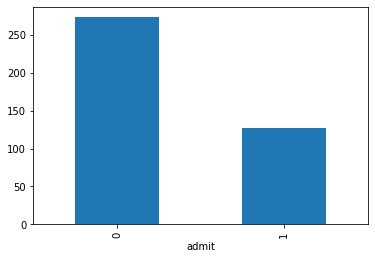

In [7]:
data.groupby('admit').admit.count().plot.bar(ylim=0)
plt.show()

Analyse rank

In [8]:
ranking = data.groupby('rank').admit.count()
ranking

rank
1     61
2    151
3    121
4     67
Name: admit, dtype: int64

In [9]:
percent_rank = (ranking / len(data)) * 100
percent_rank

rank
1    15.25
2    37.75
3    30.25
4    16.75
Name: admit, dtype: float64

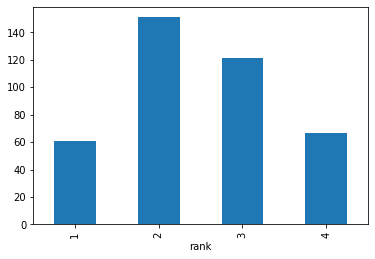

In [10]:
data.groupby('rank').admit.count().plot.bar(ylim=0)
plt.show()

Analyse GRE

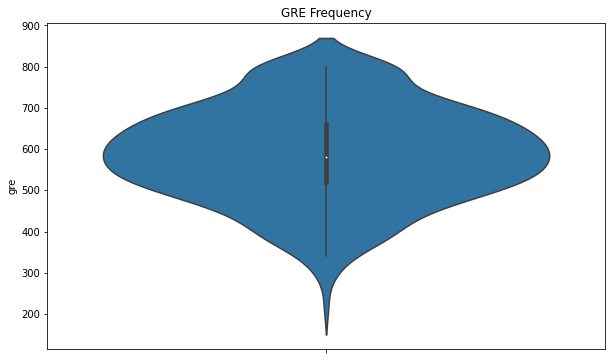

In [11]:
plt.figure(figsize=(10,6))
plt.title("GRE Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["gre"])
plt.show()

In [12]:
gre_max = data.gre.max()
gre_max

800

In [13]:
gre_min = data.gre.min()
gre_min

220

In [14]:
gre_freq = data.gre.mode()
gre_freq

0    620
dtype: int64

In [15]:
gre_low = data['gre'].value_counts()
gre_low = gre_low.tail(1)
gre_low

220    1
Name: gre, dtype: int64

Analyse GPA

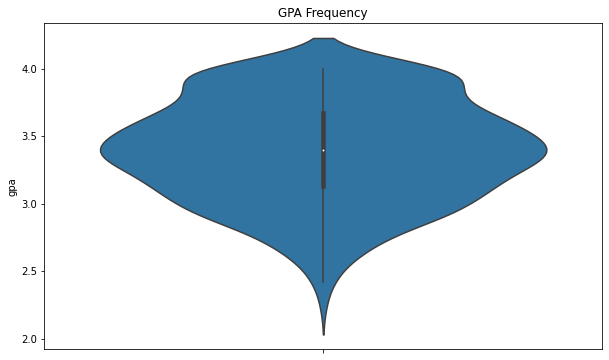

In [16]:
plt.figure(figsize=(10,6))
plt.title("GPA Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["gpa"])
plt.show()

In [17]:
gpa_max = data.gpa.max()
gpa_max

4.0

In [18]:
gpa_min = data.gpa.min()
gpa_min

2.26

In [19]:
gpa_freq = data.gpa.mode()
gpa_freq

0    4.0
dtype: float64

In [20]:
gpa_low = data['gpa'].value_counts()
gpa_low = gpa_low.tail(1)
gpa_low

2.56    1
Name: gpa, dtype: int64

Plot data

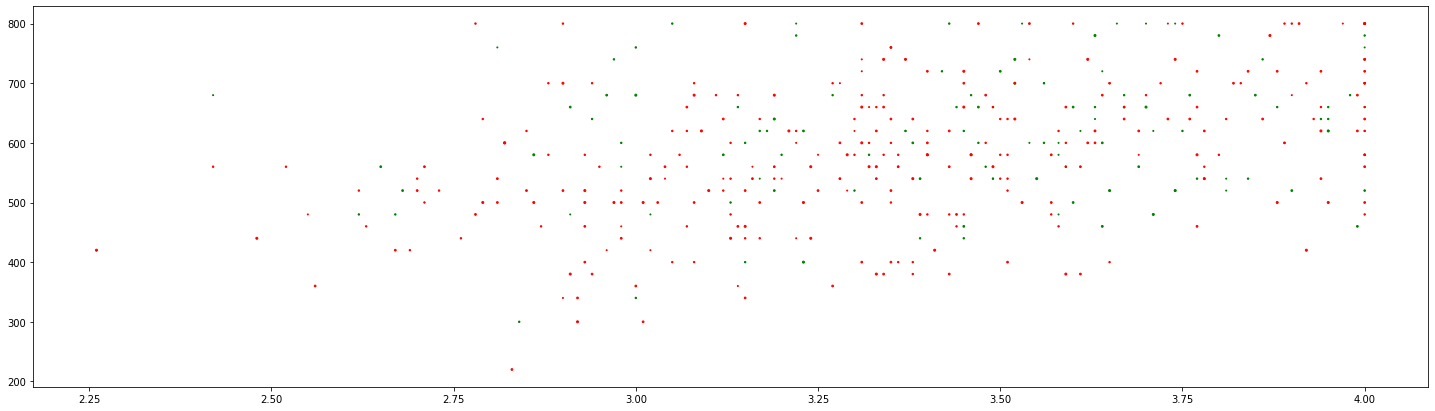

In [21]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['admit'] == 1]['gpa'], data[data['admit'] == 1]['gre'], c='green', s=data[data['admit'] == 1]['rank'])
ax.scatter(data[data['admit'] == 0]['gpa'], data[data['admit'] == 0]['gre'], c='red', s=data[data['admit'] == 0]['rank']);

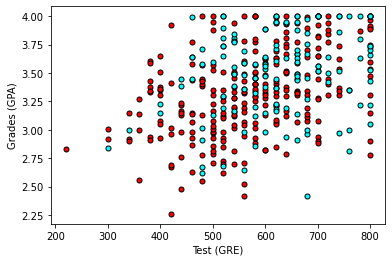

In [22]:
# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Plot data with rank

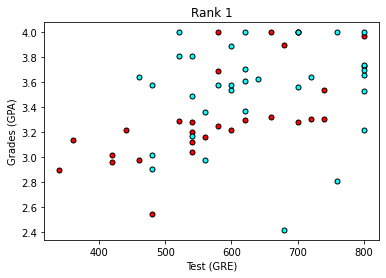

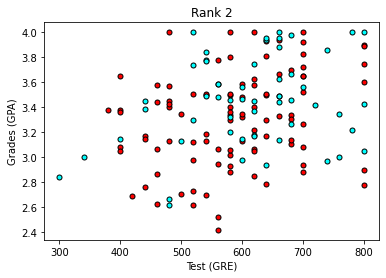

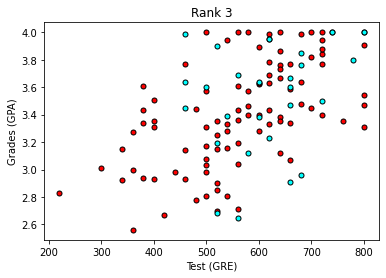

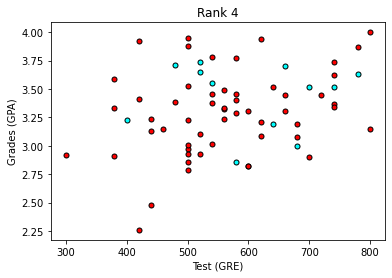

In [23]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Define X and y

In [24]:
y = data.admit

features = ['gre', 'gpa', 'rank']
X = data[features]

In [25]:
y

0      0
1      1
2      1
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: admit, Length: 400, dtype: int64

In [26]:
X

,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
2,800,4.00,1
3,640,3.19,4
4,520,2.93,4
...,...,...,...
395,620,4.00,2
396,560,3.04,3
397,460,2.63,2
398,700,3.65,2


Normalise X

In [27]:
X = (X - X.min()) / (X.max() - X.min())
X

,gre,gpa,rank
0,0.275862,0.775862,0.666667
1,0.758621,0.810345,0.666667
2,1.000000,1.000000,0.000000
3,0.724138,0.534483,1.000000
4,0.517241,0.385057,1.000000
...,...,...,...
395,0.689655,1.000000,0.333333
396,0.586207,0.448276,0.666667
397,0.413793,0.212644,0.333333
398,0.827586,0.798851,0.333333


Split data into features and targets

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((360, 3), (360,), (40, 3), (40,))

Select model

In [29]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(250,),activation='logistic', solver='lbfgs', random_state=1, max_iter=11000).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7138888888888889


Predict on validation set

In [30]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.625


In [31]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[24,  3],
       [12,  1]])

In [32]:
df_val=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df_val

,Actual,Predicted
100,0,0
221,0,0
125,0,0
38,1,0
137,0,0
215,1,0
347,0,0
186,0,0
196,0,0
301,1,0


Plot errors

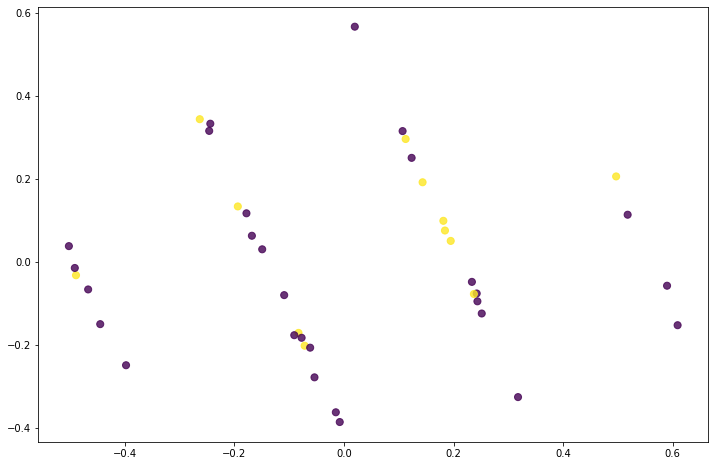

In [33]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_val - 1, alpha = .8, s = 50)